***Import Libraries***

In [380]:
import pandas as pd
import plotly.express as px
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

**Import dataset**

In [381]:
OlympicDataSet = pd.read_csv('athlete_events.csv')

OlympicDataSet.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**Drop unneeded columns**

In [ ]:
#Code by Matthew Oliver

#Don't need any of these columns
OlympicDataSet.drop(columns=['ID', 'Name', 'Sex', 'Age', 'Games', 'Season', 'City', 'Event', 'Medal'], inplace=True)

**Convert units to imperial**

In [ ]:
#Code by Matthew Oliver

#Centimeters to inches
OlympicDataSet['Height'] = OlympicDataSet['Height'] * 0.393701

#Kilograms to pounds
OlympicDataSet['Weight'] = OlympicDataSet['Weight'] * 2.20462

OlympicDataSet.head()

,Height,Weight,Team,NOC,Year,Sport
0,70.866180,176.36960,China,CHN,1992,Basketball
1,66.929170,132.27720,China,CHN,2012,Judo
2,NaN,NaN,Denmark,DEN,1920,Football
3,NaN,NaN,Denmark/Sweden,DEN,1900,Tug-Of-War
4,72.834685,180.77884,Netherlands,NED,1988,Speed Skating


**Get rid of missing data**

In [ ]:
#Code by Matthew Oliver

#Get rid of missing data
HeightandWeightData = OlympicDataSet.dropna(subset=['Height', 'Weight'])

#Make a new column where it's shown as feet and inches
HeightandWeightData['HeightFeet'] = (
	HeightandWeightData['Height'] // 12).astype(int).astype(str) + "'" + (
	HeightandWeightData['Height'] % 12).astype(int).astype(str) + '"'

HeightandWeightData.head()



C:\Users\chaos\AppData\Local\Temp\ipykernel_33372\3258811324.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Height,Weight,Team,NOC,Year,Sport,HeightFeet
0,70.866180,176.36960,China,CHN,1992,Basketball,"5'10"""
1,66.929170,132.27720,China,CHN,2012,Judo,"5'6"""
4,72.834685,180.77884,Netherlands,NED,1988,Speed Skating,"6'0"""
5,72.834685,180.77884,Netherlands,NED,1988,Speed Skating,"6'0"""
6,72.834685,180.77884,Netherlands,NED,1992,Speed Skating,"6'0"""


**Show distribution of height and weight data**

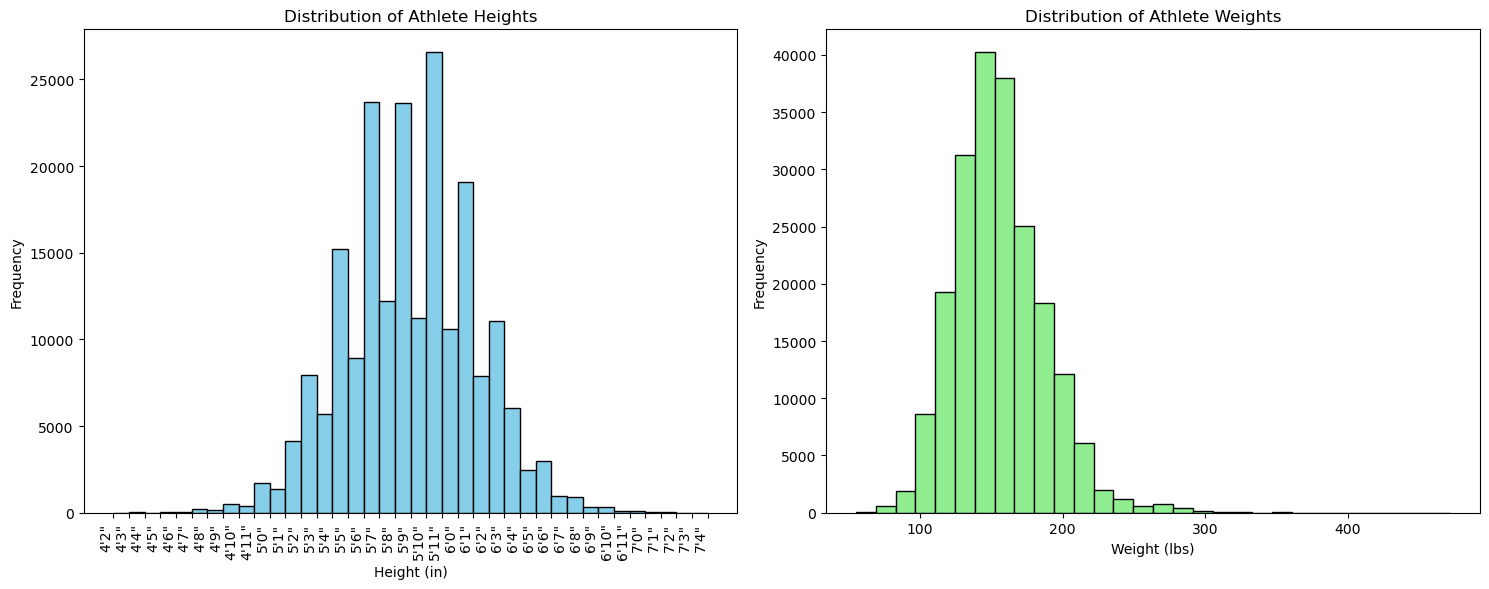

In [ ]:
#Code by Matthew Oliver

plt.figure(figsize=(15, 6))

#Sort everything by height so it displays correctly
HeightSorted = HeightandWeightData.sort_values(by='Height', ascending=True)

# Height Histogram
plt.subplot(1, 2, 1)
plt.hist(HeightSorted['HeightFeet'], bins=38, color='skyblue', edgecolor='black')
plt.title('Distribution of Athlete Heights')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Height (in)')
plt.ylabel('Frequency')

# Weight Histogram
plt.subplot(1, 2, 2)
plt.hist(HeightandWeightData['Weight'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Athlete Weights')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')

# Show plots
plt.tight_layout()
plt.show()

**Show a scatter plot of height vs weight**

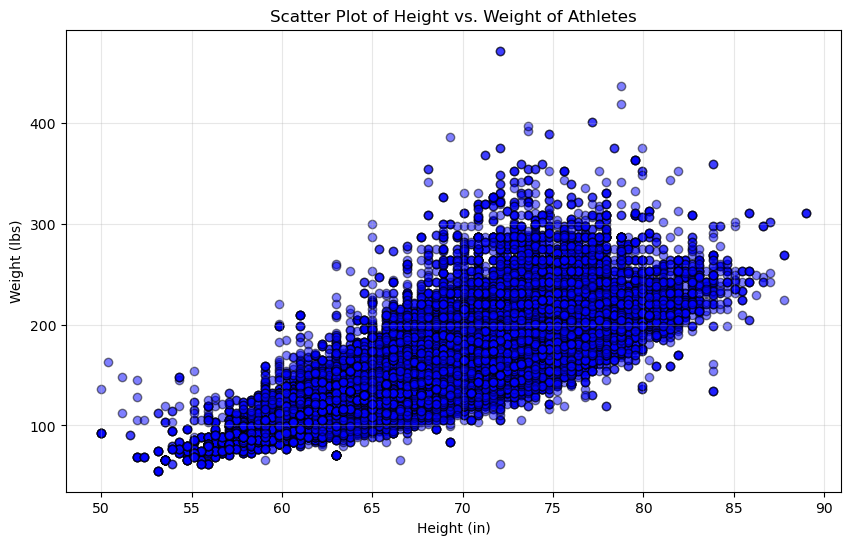

In [ ]:
#Code by Matthew Oliver

plt.figure(figsize=(10, 6))
plt.scatter(HeightandWeightData['Height'], HeightandWeightData['Weight'], alpha=0.5, color='blue', edgecolor='k')
plt.title('Scatter Plot of Height vs. Weight of Athletes')
plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')
plt.grid(alpha=0.3)
plt.show()

In [387]:


#average of Heigth and Weight by sport
sport_HvW_average = HeightandWeightData.groupby('Sport')[['Height','Weight']].mean().sort_values(by='Height', ascending=False)


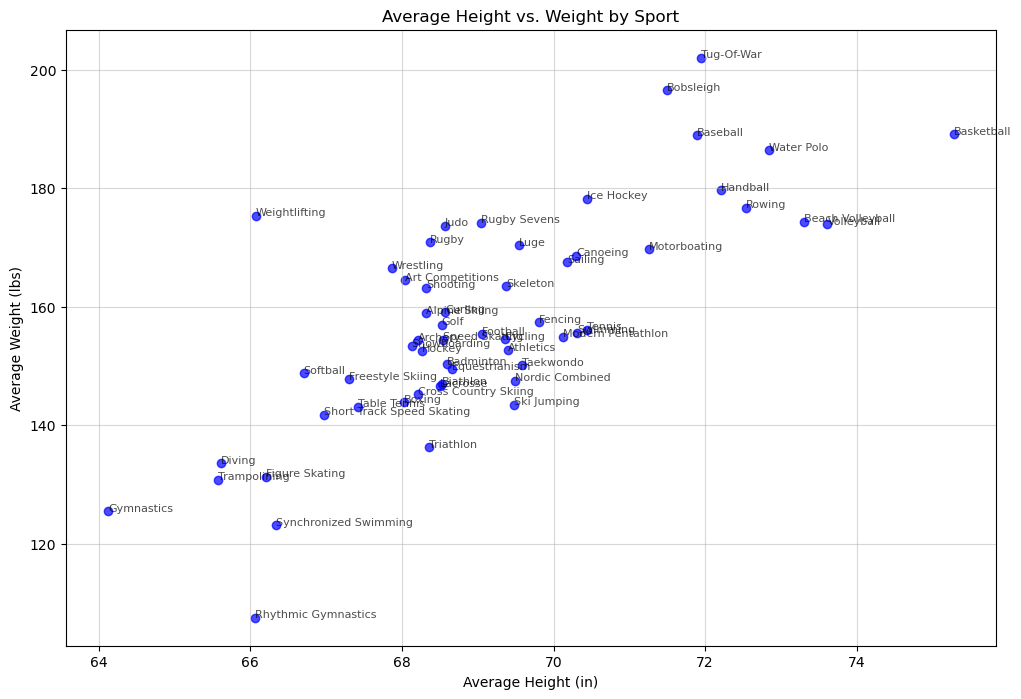

In [388]:
#scatter plot of sport v H&W
plt.figure(figsize=(12,8))
plt.scatter(sport_HvW_average['Height'], sport_HvW_average['Weight'], color='blue', alpha=0.7)

#label the sport on the scatter plot
for sport, (height,weight) in sport_HvW_average.iterrows():
    plt.text(height, weight, sport, fontsize=8, alpha=0.7)
    
#title and lables
plt.title('Average Height vs. Weight by Sport')
plt.xlabel('Average Height (in)')
plt.ylabel('Average Weight (lbs)')
plt.grid(alpha=0.5)
plt.show()

In [389]:
#Get trends based on sport, year, height, and weight
height_weight_trends = HeightandWeightData.groupby(['Sport', 'Year'])[['Height', 'Weight']].mean().reset_index()

# Select specific sports for visualization
selected_sports = ['Basketball','Baseball', 'Gymnastics', 'Swimming', 'Luge', 'Judo', 'Wrestling','Volleyball']
trends_filtered = height_weight_trends[height_weight_trends['Sport'].isin(selected_sports)]

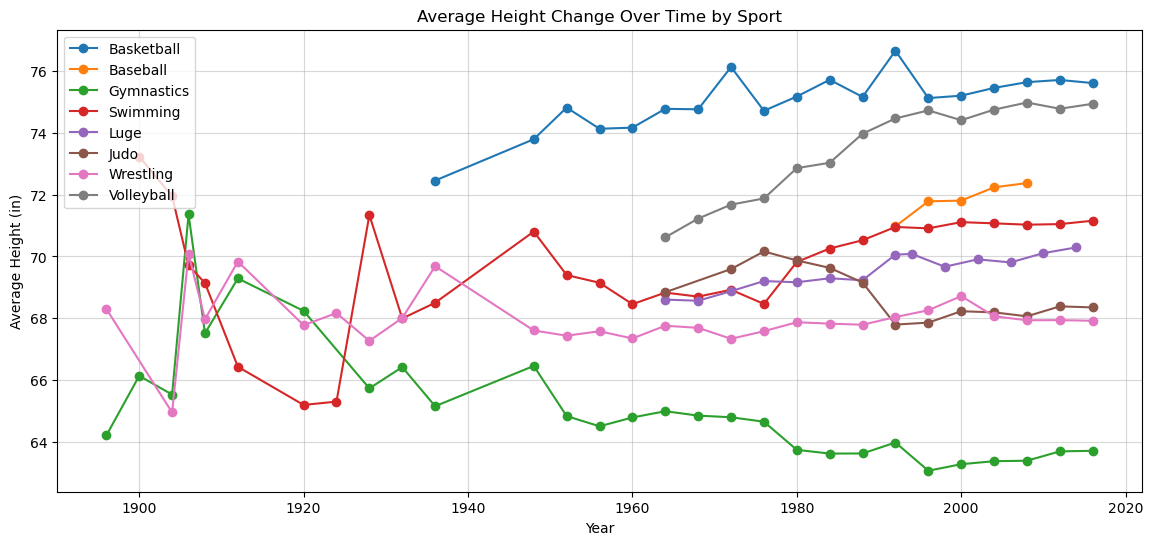

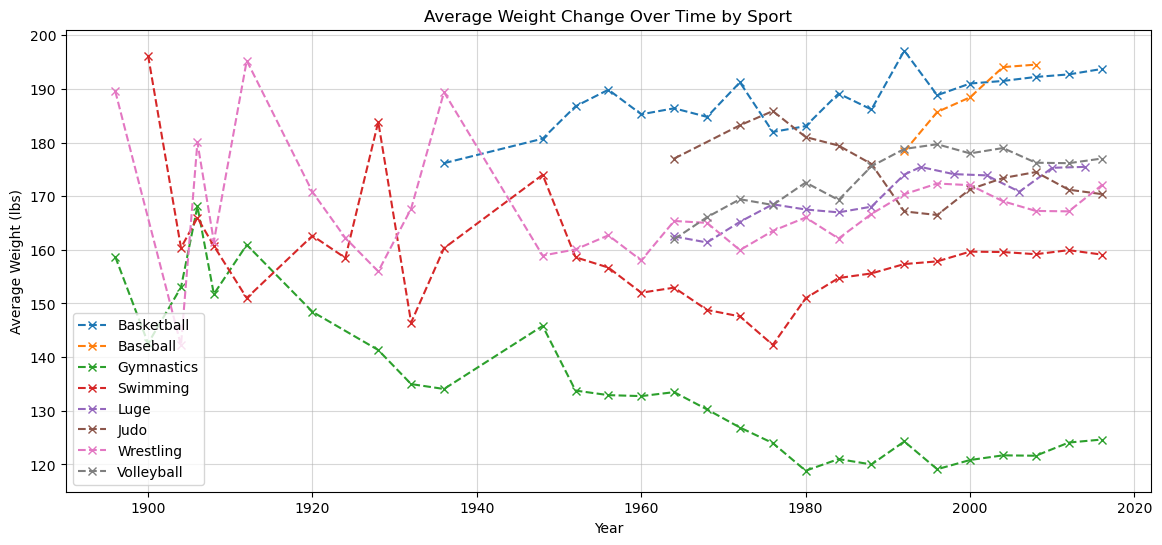

In [390]:
#plot heights overtime
plt.figure(figsize=(14,6))
for sport in selected_sports:
    sport_data = trends_filtered[trends_filtered['Sport'] == sport]
    plt.plot(sport_data['Year'], sport_data['Height'], marker='o', label=sport)

#labels, title, and legend for height
plt.title('Average Height Change Over Time by Sport')
plt.xlabel('Year')
plt.ylabel('Average Height (in)')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

#plot weights overtime
plt.figure(figsize=(14,6))
for sport in selected_sports:
    sport_data = trends_filtered[trends_filtered['Sport'] == sport]
    plt.plot(sport_data['Year'], sport_data['Weight'], marker='x', linestyle='--',label=sport)

plt.title('Average Weight Change Over Time by Sport')
plt.xlabel('Year')
plt.ylabel('Average Weight (lbs)')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

**Show the average height and weight by country with maps**

In [ ]:
#Code by Matthew Oliver

CountryAverages = OlympicDataSet.groupby("NOC")[["Height", "Weight"]].mean().reset_index()

# Rename columns for clarity
CountryAverages.rename(columns={"Height": "Average Height", "Weight": "Average Weight"}, inplace=True)

# Average Height Map using plotly, fancy fancy graph things
fig_height = px.choropleth(
    CountryAverages,
    locations="NOC",
    color="Average Height",
    hover_name="NOC",
    color_continuous_scale="Blues",
    title="Average Height by Country",
)

#Makes it looks better
fig_height.update_geos(showcoastlines=True, coastlinecolor="LightGrey")
fig_height.show()

# Average Weight Map
fig_weight = px.choropleth(
    CountryAverages,
    locations="NOC",
    color="Average Weight",
    hover_name="NOC",
    color_continuous_scale="Reds",
    title="Average Weight by Country",
)

fig_weight.update_geos(showcoastlines=True, coastlinecolor="LightGrey")
fig_weight.show()